# A Machine learning problem: reduced order modelling and video prediction
Data: 48 videos are available, describing the evolution of a physical field with different initial conditions. Each video is of dimension 128 * 128 * 16 (timesteps) with binary pixel values. For all the tasks please use the first 40 videos as training (including validation) data and the rest 8 as test data

##### Q1 Perform the Principle component analysis of the training dataset where each snapshot (i.e., image) is considered as a sample. Use the principle component for data compressing and decompressing.

1. Convert mp4 to frame png files
2. Perform PCA to compress data



##### Step 1: Import libraries and visualise data

In [37]:
import cv2
import os
from sklearn.decomposition import PCA 
import numpy as np 
import imageio
import matplotlib.pyplot as plt

In [40]:
videos = np.zeros((49, 16, 128, 128))


for i in range(49):
    path = 'data/video_' + str(i)
    
    if not os.path.exists(path):
        os.mkdir(path)
    else:
        print("Folder already exists")

    vid = cv2.VideoCapture('videos/fire_Chimney_video_' + str(i) + '.mp4')
    print(int(vid.get(cv2.CAP_PROP_FRAME_COUNT)))


    frames = np.zeros((16, 128, 128))

    currentframe = 0

    for j in range(16):

        ret, frame = vid.read()

        if ret == False:
            vid.release()
            print(str(j) + " fail")
            break


        else:
            name = 'data/video_' + str(i) + '/' + str(j) +  ".png"
            g_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(name, g_frame)
            frames[j,:,:] = np.array(g_frame)


            print(str(j) + " success")

        cv2.destroyAllWindows()

    videos[i,:,:,:] = frames


print(videos.shape)


Folder already exists
16
0 success
1 success
2 success
3 success
4 success
5 success
6 success
7 success
8 success
9 success
10 success
11 success
12 success
13 success
14 success
15 success
Folder already exists
16
0 success
1 success
2 success
3 success
4 success
5 success
6 success
7 success
8 success
9 success
10 success
11 success
12 success
13 success
14 success
15 success
Folder already exists
16
0 success
1 success
2 success
3 success
4 success
5 success
6 success
7 success
8 success
9 success
10 success
11 success
12 success
13 success
14 success
15 success
Folder already exists
16
0 success
1 success
2 success
3 success
4 success
5 success
6 success
7 success
8 success
9 success
10 success
11 success
12 success
13 success
14 success
15 success
Folder already exists
16
0 success
1 success
2 success
3 success
4 success
5 success
6 success
7 success
8 success
9 success
10 success
11 success
12 success
13 success
14 success
15 success
Folder already exists
16
0 success
1 success


#### Video 1 pre-PCA

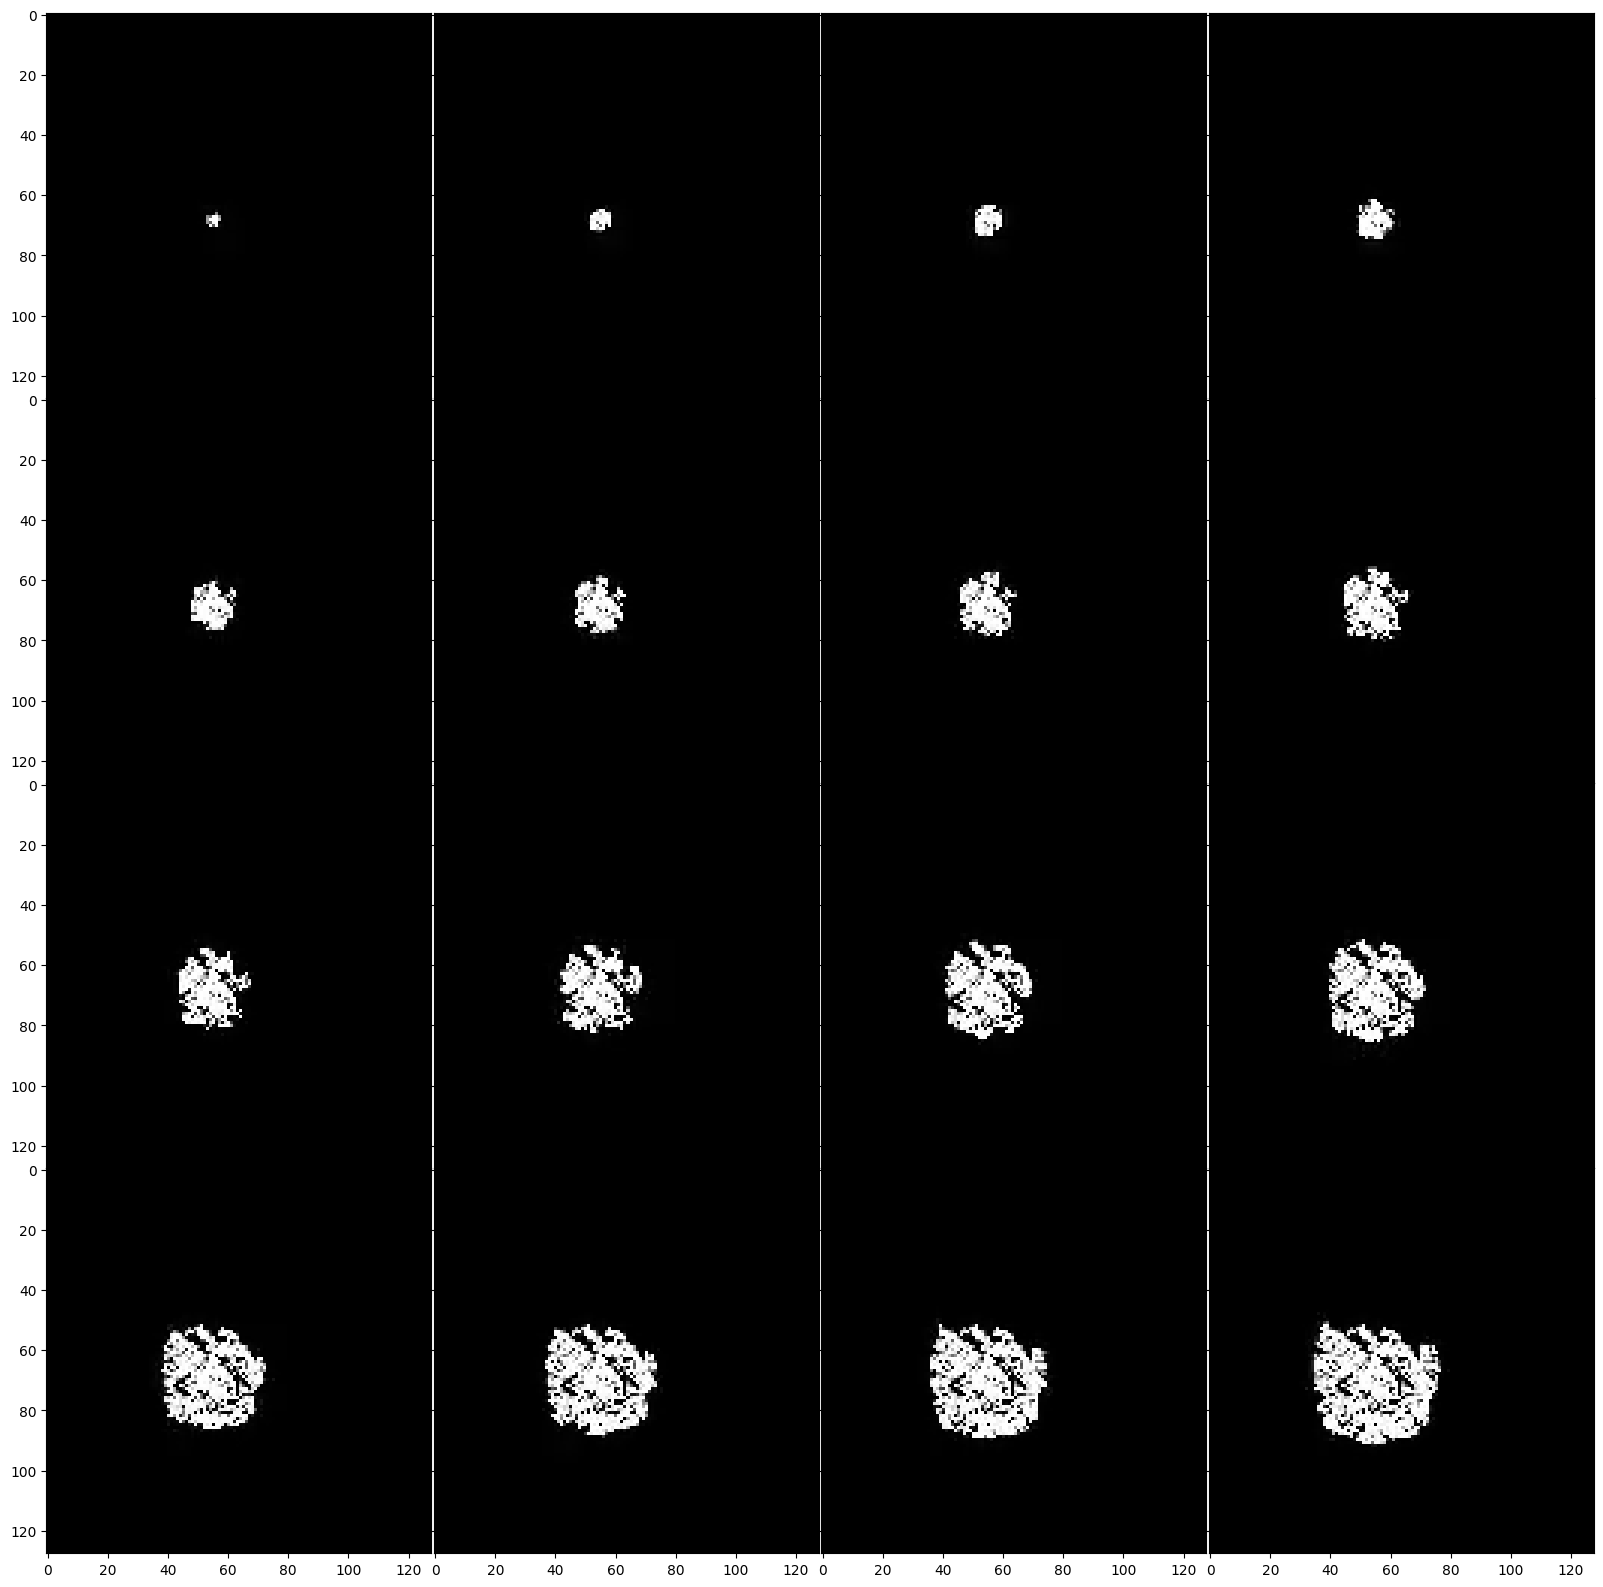

In [76]:
video_1 = videos[0,:,:,:]

fig, axs = plt.subplots(4, 4, sharey = True, sharex = True, figsize = (20,20))
fig.subplots_adjust(wspace = 0, hspace = 0)


for i in range(4):
    axs[i][0].imshow((video_1[(4*i),:,:]), cmap = 'grey')
    axs[i][1].imshow((video_1[4*(i)+1,:,:]), cmap = 'grey')
    axs[i][2].imshow((video_1[4*(i)+2,:,:]), cmap = 'grey')
    axs[i][3].imshow((video_1[4*(i)+3,:,:]), cmap = 'grey')
    


#### PCA on video 1

In [77]:
no_frames, height, width = video_1.shape

vid_matrix = video_1.reshape(no_frames, -1)

n_components = 50

pca = PCA(n_components= n_components)

compressed = pca.fit_transform(vid_matrix)

decomp = pca.inverse_transform(compressed)

decomp = decomp.reshape(no_frames, height, width)

fig, axs = plt.subplots(4, 4, sharey = True, sharex = True, figsize = (20,20))
fig.subplots_adjust(wspace = 0, hspace = 0)


for i in range(4):
    axs[i][0].imshow((decomp[(4*i),:,:]), cmap = 'grey')
    axs[i][1].imshow((decomp[4*(i)+1,:,:]), cmap = 'grey')
    axs[i][2].imshow((decomp[4*(i)+2,:,:]), cmap = 'grey')
    axs[i][3].imshow((decomp[4*(i)+3,:,:]), cmap = 'grey')
    




ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=16 with svd_solver='full'